# Sidel – Wrangling & EDA
This notebook loads the alarm and recipe datasets for three machines, parses timestamps, summarises the data, and plots a few key distributions.

*Run this in the same folder as the seven CSV/XLSX files.*

In [1]:
import pandas as pd, glob, matplotlib.pyplot as plt, os

# Map dataset filenames (adjust if your names differ)
recipe_files = {
    'machine1': 'Data/df_recipe_performance_machine1.csv',
    'machine2': 'Data/df_recipe_performance_machine2.csv',
    'machine3': 'Data/df_recipe_performance_machine3.csv'
}

alarm_files = {
    'machine1': 'Data/alarm_machine1.csv',
    'machine2': 'Data/alarm_machine2.csv',
    'machine3': 'Data/alarm_machine3.csv'
}

df_recipe = {}
for m, fp in recipe_files.items():
    df = pd.read_csv(fp)
    ts_col = [c for c in df.columns if 'time' in c.lower()][0]
    df[ts_col] = pd.to_datetime(df[ts_col])
    df['machine'] = m
    df = df.sort_values(ts_col)
    df_recipe[m] = df

recipes_all = pd.concat(df_recipe.values(), ignore_index=True)
print('Recipes loaded:', recipes_all.shape)

alarms = {}
for m, fp in alarm_files.items():
    df = pd.read_csv(fp)
    dt_col = [c for c in df.columns if 'time' in c.lower() or 'created' in c.lower()][0]
    df[dt_col] = pd.to_datetime(df[dt_col])
    df['machine'] = m
    alarms[m] = df

alarms_all = pd.concat(alarms.values(), ignore_index=True)
print('Alarms loaded:', alarms_all.shape)

Recipes loaded: (18584, 33)
Alarms loaded: (2843, 8)


In [2]:
recipes_all.describe().T.head()

C:\Users\rtira\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
availability,18584.0,88.024153,27.005473,0.0,92.592593,100.000000,100.000000,100.0
operationalavailability,18584.0,54.564503,29.123350,0.0,34.605198,59.847222,77.694444,100.0
efficiency,18584.0,54.156486,29.610879,0.0,33.963426,58.633863,78.493905,100.0
oee,18584.0,51.502145,29.773294,0.0,29.821498,55.076296,76.144907,100.0
qualityrate,18584.0,99.847773,2.846821,0.0,99.994999,100.000000,100.000000,100.0


In [3]:
alarms_all.head()

,createdAt,valveNumber,textDetail,alarmFaultId,predictingAlgoId,alarmActivated,criticityId,machine
0,2024-01-13 11:00:00,9,Bottle burst,368,61,1,2,machine1
1,2024-01-13 13:00:00,9,Bottle burst,368,61,1,2,machine1
2,2024-01-19 11:00:00,9,Bottle burst,368,61,1,2,machine1
3,2024-01-19 13:00:00,9,Bottle burst,368,61,1,2,machine1
4,2024-01-30 11:00:00,11,Bottle burst,368,61,1,2,machine1


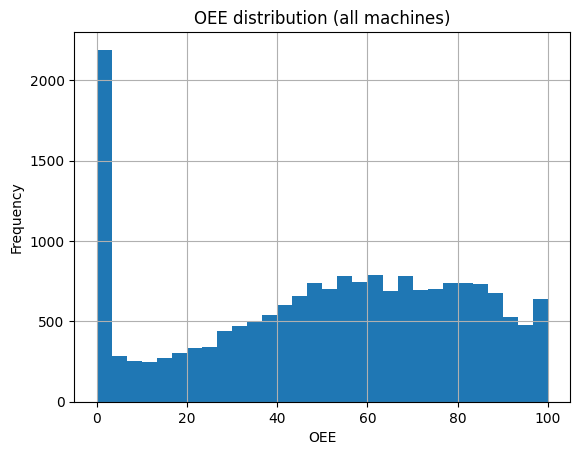

In [4]:
if 'oee' in recipes_all.columns:
    recipes_all['oee'].hist(bins=30)
    plt.title('OEE distribution (all machines)')
    plt.xlabel('OEE')
    plt.ylabel('Frequency')
    plt.show()

energy_cols = [c for c in recipes_all.select_dtypes('number').columns if 'energy' in c.lower()]
if energy_cols:
    recipes_all[energy_cols[0]].hist(bins=30)
    plt.title(f'{energy_cols[0]} distribution')
    plt.xlabel(energy_cols[0])
    plt.ylabel('Frequency')
    plt.show()